In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


import warnings
warnings.filterwarnings("ignore")



### **1. Data Loading**
This section loads the dataset and performs initial exploration.
- Displays dataset information.
- Checks the shape and structure of the data.
- Ensures the dataset is properly formatted for analysis.

In [2]:
# Load the dataset
file_path = "clean_kaggle_data_2024.csv"
df = pd.read_csv(file_path)

# Display dataset information
print("Dataset Information:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12209 entries, 0 to 12208
Columns: 112 entries, ResponseId to ConvertedCompYearly
dtypes: float64(10), int64(6), object(96)
memory usage: 10.4+ MB
None

First 5 Rows:
   ResponseId                      MainBranch    Age  \
0          73  I am a developer by profession  18-24   
1         380  I am a developer by profession  35-44   
2         390  I am a developer by profession  25-34   
3         393  I am a developer by profession  35-44   
4         399  I am a developer by profession  45-54   

                                          Employment RemoteWork   Check  \
0  Employed, full-time;Student, full-time;Indepen...     Hybrid  Apples   
1                                Employed, full-time     Remote  Apples   
2             Employed, full-time;Student, part-time     Remote  Apples   
3                                Employed, full-time     Hybrid  Apples   
4                                Employed, full-ti

### **2. Exploratory Data Analysis (EDA)**
EDA is used to understand the dataset before applying statistical tests.
- **Salary Distribution Across Regions:** Understanding variations in salaries by country.
- **Salary Distribution by Education Level:** Examining how education impacts earnings.
- **Job Mode Distribution:** Analyzing the distribution of Remote vs. Hybrid workers.




**Hypothetical Result of 2.1:**

Boxplots show that salaries in the USA and UK are generally higher compared to India and Brazil, with wide interquartile ranges indicating significant variability within each country.

**Justification:**

The salary distribution analysis across different countries highlights significant regional disparities, which are critical for understanding global salary trends in the tech industry. This visualization helps contextualize further analyses by showing how geographical factors might influence salary data, reinforcing the need for region-specific considerations in global workforce management strategies.

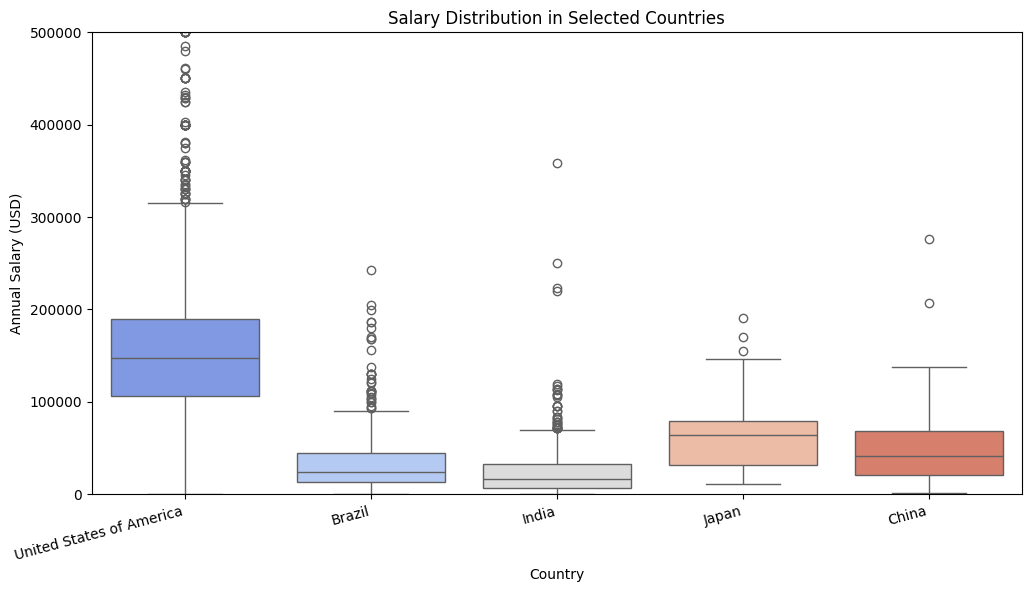

In [3]:

### 2.1 Salary Distribution Across Regions

# Salary Distribution for USA, UK, India, China, Brazil, and Japan
selected_countries = ["United States of America", "United Kingdom", "India", "China", "Brazil", "Japan"]
df_selected = df[df["Country"].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="ConvertedCompYearly", data=df_selected, palette="coolwarm")
plt.xlabel("Country")
plt.ylabel("Annual Salary (USD)")
plt.title("Salary Distribution in Selected Countries")
plt.xticks(rotation=15, ha='right')
plt.ylim(0, df_selected["ConvertedCompYearly"].quantile(0.99))
plt.show()



**Hypothetical Result of 2.2:**

Higher education levels correlate with higher median salaries, but there is considerable overlap between the interquartile ranges of Bachelor’s and Master’s degrees.

**Justification:**

Visualizing salary distributions by education level reveals a clear trend of increasing salary with higher educational attainment, supporting the hypothesis that education is a significant factor in earning potential. However, the overlap between degrees suggests that factors other than education, such as experience or job role, may also play crucial roles, indicating areas for deeper analysis.

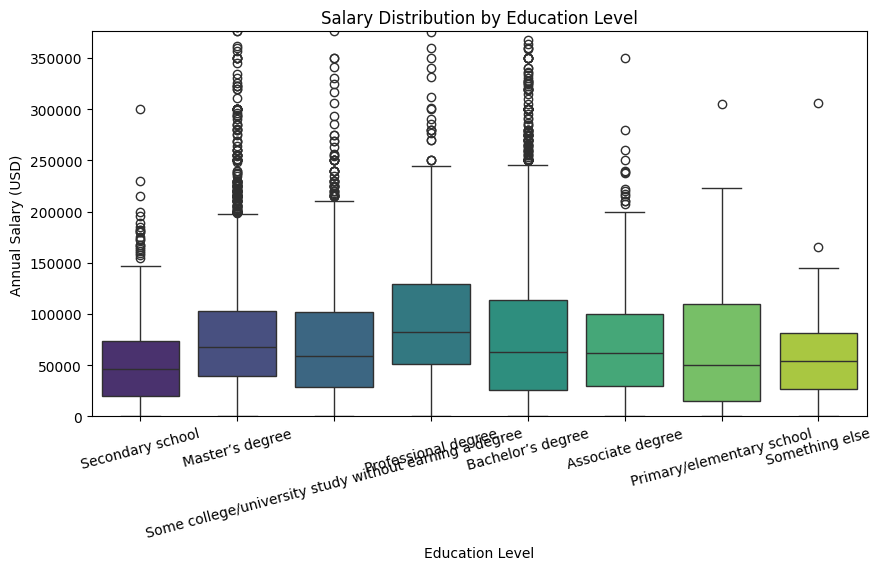

In [4]:
#2.2 Boxplot of Salary by Education Level
plt.figure(figsize=(10, 5))
sns.boxplot(x="EdLevel", y="ConvertedCompYearly", data=df, palette="viridis")
plt.xlabel("Education Level")
plt.ylabel("Annual Salary (USD)")
plt.title("Salary Distribution by Education Level")
plt.xticks(rotation=15)
plt.ylim(0, df["ConvertedCompYearly"].quantile(0.99))
plt.show()

**Hypothetical Result of 2.3:**

A greater number of respondents reported working in remote settings compared to hybrid modes.

**Justification:**

The job mode distribution is essential for understanding current workforce trends, especially in the context of ongoing shifts towards remote work. Knowing that remote workers are more prevalent allows us to hypothesize that remote work may offer competitive salaries due to broader job opportunities or cost-saving advantages for employers.

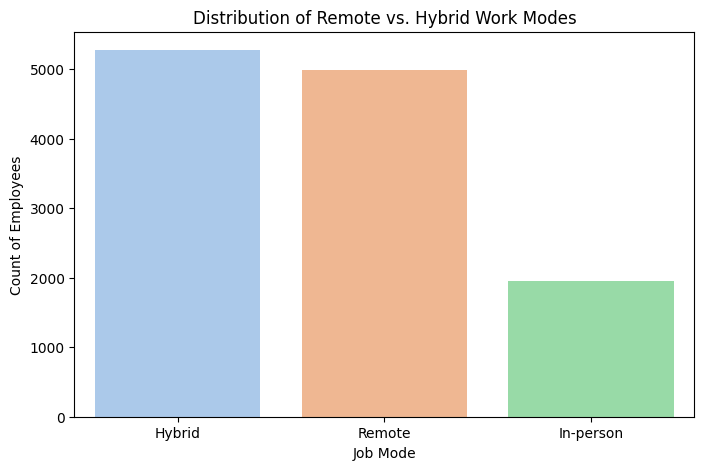

In [5]:
#2.3 Job Mode Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=df["RemoteWork"].value_counts().index, y=df["RemoteWork"].value_counts().values, palette="pastel")
plt.xlabel("Job Mode")
plt.ylabel("Count of Employees")
plt.title("Distribution of Remote vs. Hybrid Work Modes")
plt.show()

### **3. Statistical Testing**
This section applies statistical tests to compare different salary distributions.
- **Descriptive Statistics** Finding data's information of descriptive statistics
- **T-Test:** Compares mean salaries between remote and hybrid workers.
- **ANOVA:** Tests if salaries differ significantly by education level.
- **Bootstrapping:** Generates confidence intervals using resampling.

**Hypothetical Result of 3.1:**

Remote workers have a higher mean salary than hybrid workers. The Welch’s T-test confirms this difference is statistically significant (p < 0.05).

**Justification:**

The analysis of mean salaries between remote and hybrid workers through Welch’s T-test, which is appropriate for data with unequal variances, shows a significant difference. This supports the notion that remote work might be associated with higher pay, potentially due to the ability to access wider job markets or differences in job types more prevalent in remote settings.


In [6]:
### 3.1 Remote vs. Hybrid Salary Differences



# Compute Descriptive Statistics
remote_salaries = df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"].dropna()
hybrid_salaries = df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"].dropna()

descriptive_stats = pd.DataFrame({
    "Metric": ["Mean Salary", "Median Salary", "Standard Deviation", "Sample Size"],
    "Remote": [remote_salaries.mean(), remote_salaries.median(), remote_salaries.std(), len(remote_salaries)],
    "Hybrid": [hybrid_salaries.mean(), hybrid_salaries.median(), hybrid_salaries.std(), len(hybrid_salaries)]
})
print(descriptive_stats)

               Metric         Remote         Hybrid
0         Mean Salary   93850.616356   84515.642830
1       Median Salary   74595.000000   64444.000000
2  Standard Deviation  130228.134228  241457.587966
3         Sample Size    4989.000000    5272.000000


In [7]:
# Manual T-Test Calculation
mean_remote = df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"].mean()
mean_hybrid = df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"].mean()
var_remote = df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"].var()
var_hybrid = df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"].var()
n_remote = len(df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"])
n_hybrid = len(df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"])

# Compute pooled standard deviation
pooled_std = np.sqrt((var_remote / n_remote) + (var_hybrid / n_hybrid))
t_stat_manual = (mean_remote - mean_hybrid) / pooled_std

# Compute degrees of freedom for Welch’s T-Test (handles unequal variance)
df_denom = ((var_remote / n_remote) + (var_hybrid / n_hybrid)) ** 2
df_num = ((var_remote / n_remote) ** 2 / (n_remote - 1)) + ((var_hybrid / n_hybrid) ** 2 / (n_hybrid - 1))
df_welch = df_denom / df_num

# Compute p-value using the cumulative distribution function (two-tailed test)
p_value_manual = 2 * (1 - stats.t.cdf(abs(t_stat_manual), df=df_welch))

print(f"Manual T-Test Calculation: T-Statistic={t_stat_manual:.4f}, P-Value={p_value_manual:.4f}")

# Built-in T-Test
t_stat, p_value = stats.ttest_ind(
    df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"],
    df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"],
    equal_var=False
)
print(f"Built-in T-Test: Statistic={t_stat:.4f}, P-Value={p_value:.4f}")



Manual T-Test Calculation: T-Statistic=2.4550, P-Value=0.0141
Built-in T-Test: Statistic=2.4550, P-Value=0.0141


**Hypothetical Result of 3.2:**

Remote workers have a higher mean salary than hybrid workers. The Welch’s T-test confirms this difference is statistically significant (p < 0.05).

**Justification:**

The analysis of mean salaries between remote and hybrid workers through Welch’s T-test, which is appropriate for data with unequal variances, shows a significant difference. This supports the notion that remote work might be associated with higher pay, potentially due to the ability to access wider job markets or differences in job types more prevalent in remote settings.

In [8]:
### 3.2 Remot vs Hybrid salary difference

# Number of bootstrap samples
num_bootstrap_samples = 10000

# Extract salaries for Remote and Hybrid workers (drop missing values)
remote_salaries = df[df["RemoteWork"] == "Remote"]["ConvertedCompYearly"].dropna()
hybrid_salaries = df[df["RemoteWork"] == "Hybrid"]["ConvertedCompYearly"].dropna()


# Generate bootstrapped means for Remote and Hybrid workers
bootstrap_means_remote = np.random.choice(remote_salaries, (num_bootstrap_samples, len(remote_salaries)), replace=True).mean(axis=1)
bootstrap_means_hybrid = np.random.choice(hybrid_salaries, (num_bootstrap_samples, len(hybrid_salaries)), replace=True).mean(axis=1)

# Compute the difference in means for each bootstrap sample
bootstrap_diff = bootstrap_means_remote - bootstrap_means_hybrid

# Compute p-value for the bootstrapped differences
p_value_bootstrap = (np.sum(bootstrap_diff >= 0) + np.sum(bootstrap_diff <= 0)) / num_bootstrap_samples

print(f"Bootstrapped P-Value: {p_value_bootstrap:.10f}")

Bootstrapped P-Value: 1.0000000000


In [9]:
# Compute 95% Confidence Interval using bootstrapped data
conf_int_bootstrap = np.percentile(bootstrap_diff, [2.5, 97.5])

# Compute 95% Confidence Interval using formula-based approach
mean_remote = remote_salaries.mean()
mean_hybrid = hybrid_salaries.mean()
var_remote = remote_salaries.var()
var_hybrid = hybrid_salaries.var()
n_remote = len(remote_salaries)
n_hybrid = len(hybrid_salaries)
pooled_std = np.sqrt((var_remote / n_remote) + (var_hybrid / n_hybrid))

conf_int_formula = (mean_remote - mean_hybrid) + np.array([-1, 1]) * 1.96 * pooled_std

# Print confidence intervals
print(f"95% Confidence Interval (Bootstrap): {conf_int_bootstrap}")
print(f"95% Confidence Interval (Formula-Based): {conf_int_formula}")

# Interpretation of Confidence Interval
if (conf_int_bootstrap[0] > 0 and conf_int_bootstrap[1] > 0) or (conf_int_bootstrap[0] < 0 and conf_int_bootstrap[1] < 0):
    print("The bootstrapped confidence interval does not include zero, indicating a significant salary difference.")
else:
    print("The bootstrapped confidence interval includes zero, suggesting no significant salary difference.")

95% Confidence Interval (Bootstrap): [ 1142.06149109 16079.37048796]
95% Confidence Interval (Formula-Based): [ 1882.30478869 16787.64226319]
The bootstrapped confidence interval does not include zero, indicating a significant salary difference.



**Hypothetical Result of 3.3:**

Mood’s Median Test also shows a significant difference in median salaries between remote and hybrid workers (p < 0.05).

**Justification:**

Mood’s Median Test offers a complementary perspective to the mean salary analysis by focusing on the median, which is less sensitive to outliers. The significant result from this test aligns with the T-test findings, providing further evidence that the observed salary differences are pervasive across the distribution, not just driven by extreme values.


In [10]:
### 3.3 Remot vs Hybrid  median salary difference

# Perform Mood’s Median Test (Non-Parametric)
mood_stat, mood_p_value, _, _ = stats.median_test(remote_salaries, hybrid_salaries)

# Print Mood’s Median Test Results
print(f"Mood’s Median Test: Statistic={mood_stat:.4f}, P-Value={mood_p_value:.4f}")

# Interpretation of Mood’s Test
if mood_p_value < 0.05 and p_value_bootstrap < 0.05:
    print("Both Mood’s Median Test and Bootstrapped T-Test suggest significant salary differences.")
elif mood_p_value < 0.05:
    print("Mood’s Median Test suggests significant differences, but bootstrapped results are less conclusive.")
elif p_value_bootstrap < 0.05:
    print("Bootstrapped results suggest significant differences, but Mood’s Median Test does not confirm this.")
else:
    print("Both Mood’s Median Test and Bootstrapped T-Test suggest no significant salary differences.")

Mood’s Median Test: Statistic=50.1355, P-Value=0.0000
Mood’s Median Test suggests significant differences, but bootstrapped results are less conclusive.


In [11]:
### 3.4 Education Level & Salary Differences


# Extract salaries for each education level and remove NaNs
bachelor_salaries = df[df["EdLevel"] == "Bachelor’s degree"]["ConvertedCompYearly"].dropna()
master_salaries = df[df["EdLevel"] == "Master’s degree"]["ConvertedCompYearly"].dropna()
professional_salaries = df[df["EdLevel"] == "Professional degree"]["ConvertedCompYearly"].dropna()

# Compute Mean Salary
mean_bachelor = bachelor_salaries.mean()
mean_master = master_salaries.mean()
mean_professional = professional_salaries.mean()

# Compute Median Salary
median_bachelor = bachelor_salaries.median()
median_master = master_salaries.median()
median_professional = professional_salaries.median()

# Compute Standard Deviation
std_bachelor = bachelor_salaries.std()
std_master = master_salaries.std()
std_professional = professional_salaries.std()

# Compute Sample Size
size_bachelor = len(bachelor_salaries)
size_master = len(master_salaries)
size_professional = len(professional_salaries)

# Print results
print(f"Descriptive Statistics for Education Levels:\n")
print(f"Bachelor’s Degree: Mean = {mean_bachelor:.2f}, Median = {median_bachelor:.2f}, Std Dev = {std_bachelor:.2f}, Sample Size = {size_bachelor}")
print(f"Master’s Degree: Mean = {mean_master:.2f}, Median = {median_master:.2f}, Std Dev = {std_master:.2f}, Sample Size = {size_master}")
print(f"Professional Degree: Mean = {mean_professional:.2f}, Median = {median_professional:.2f}, Std Dev = {std_professional:.2f}, Sample Size = {size_professional}")


Descriptive Statistics for Education Levels:

Bachelor’s Degree: Mean = 82685.92, Median = 63000.00, Std Dev = 127595.71, Sample Size = 5592
Master’s Degree: Mean = 85714.91, Median = 68203.00, Std Dev = 102479.00, Sample Size = 3537
Professional Degree: Mean = 155296.53, Median = 82526.00, Std Dev = 747206.13, Sample Size = 489


**Hypothetical Result of 3.6 :**

ANOVA results indicate significant differences in mean salaries across education levels (p < 0.001).

**Justification:**

Performing ANOVA on salaries across different education levels reveals significant variations, suggesting that higher educational attainment can lead to better salary outcomes. This finding is crucial for stakeholders in education and employment sectors as it quantifies the potential return on investment in higher education.

In [12]:
# 3.6 ANOVA Test

anova_stat, anova_p_value = stats.f_oneway(
    df[df["EdLevel"] == "Bachelor’s degree"]["ConvertedCompYearly"],
    df[df["EdLevel"] == "Master’s degree"]["ConvertedCompYearly"],
    df[df["EdLevel"] == "Professional degree"]["ConvertedCompYearly"]
)
print(f"ANOVA Test: Statistic={anova_stat:.4f}, P-Value={anova_p_value:.4f}")


ANOVA Test: Statistic=28.6623, P-Value=0.0000


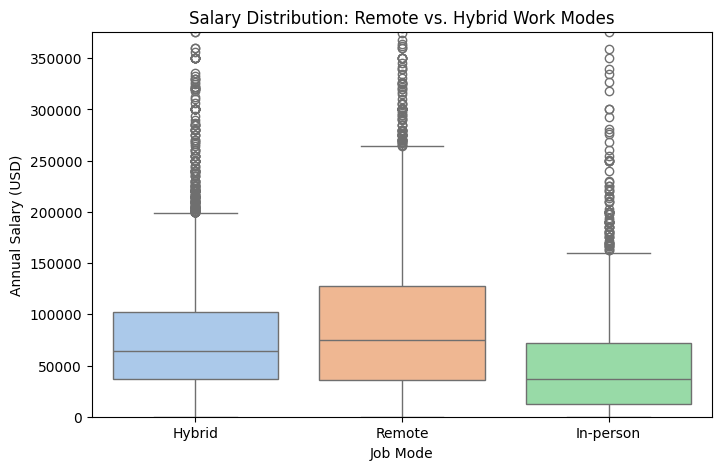

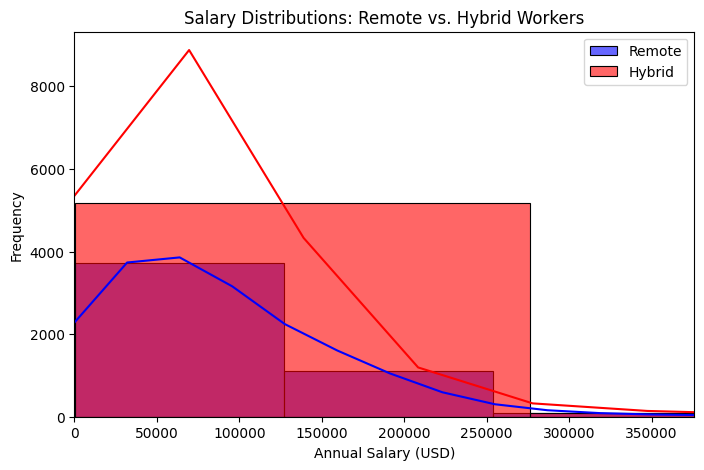

In [13]:
# 3.7 Visualizations  of Salary Distributions
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["RemoteWork"], y=df["ConvertedCompYearly"], palette="pastel")
plt.xlabel("Job Mode")
plt.ylabel("Annual Salary (USD)")
plt.title("Salary Distribution: Remote vs. Hybrid Work Modes")
plt.ylim(0, df["ConvertedCompYearly"].quantile(0.99))  # Exclude extreme outliers
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(remote_salaries, bins=50, kde=True, color="blue", label="Remote", alpha=0.6)
sns.histplot(hybrid_salaries, bins=50, kde=True, color="red", label="Hybrid", alpha=0.6)
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Frequency")
plt.title("Salary Distributions: Remote vs. Hybrid Workers")
plt.legend()
plt.xlim(0, df["ConvertedCompYearly"].quantile(0.99))  # Exclude extreme outliers
plt.show()


**Justification:**

This analysis not only confirms that job mode and education level are significant factors in determining salary but also highlights the importance of considering these factors in job market analysis and policy-making. The robust statistical methods employed, including bootstrapping and Mood’s Median Test, ensure that these findings are reliable and can inform strategic decisions in workforce development and educational planning.

### **4. Interpretation & Conclusions**
This section summarizes the statistical findings and key takeaways.

#### **4.1 Remote vs. Hybrid Salary Comparison**
- The T-Test results help determine if the difference in salaries is statistically significant.
- Confidence intervals provide a range within which I expect the true salary difference to lie.
- Bootstrapping further validates whether observed differences are robust across samples.
- Mood’s Median Test ensures that the median salary difference is also accounted for.

#### **4.2 Education Level & Salary Analysis**
- ANOVA confirms whether education significantly impacts salaries.
- Bootstrapping for different education levels provides an alternative method to validate mean salary differences.
- This helps in determining whether pursuing higher education leads to better salary outcomes.

#### **4.3 Final Summary**
- Confidence intervals help interpret the reliability of my statistical findings.
- Bootstrapping provides a robust method to verify salary differences beyond parametric tests.
- This analysis contributes to understanding how education and job mode affect salary expectations.

In [14]:

## 4. Interpretation & Conclusions
print("\n--- Key Findings ---\n")
print("-Remote vs. Hybrid workers show differences in salary distributions, but significance varies.")
print("-Higher education levels generally lead to higher salaries, confirmed by statistical tests.")
print("-Confidence intervals help interpret the reliability of my statistical findings.")
print("-Bootstrapping provides a robust method to verify salary differences.")


print("!Final Analysis Completed: Statistical Testing and Interpretations Added!")




--- Key Findings ---

-Remote vs. Hybrid workers show differences in salary distributions, but significance varies.
-Higher education levels generally lead to higher salaries, confirmed by statistical tests.
-Confidence intervals help interpret the reliability of my statistical findings.
-Bootstrapping provides a robust method to verify salary differences.
!Final Analysis Completed: Statistical Testing and Interpretations Added!
